# **LSTM MODEL**

### **INITIAL VERSIONS**

In [ ]:
from google.colab import drive
drive.mount('/cont/drentive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/activity_data_raw/"


body_acc_x_train.txt  body_acc_z_train.txt   body_gyro_y_train.txt  total_acc_z_train.txt
body_acc_y_train.txt  body_gyro_x_train.txt  body_gyro_z_train.txt


*Uploading Raw Data for Training and Testing*

In [ ]:
import numpy as np

X_train_acc_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_x_train.txt")
X_train_acc_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_y_train.txt")
X_train_acc_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_z_train.txt")

X_test_acc_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_x_test.txt")
X_test_acc_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_y_test.txt")
X_test_acc_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_z_test.txt")

X_train_gyro_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_x_train.txt")
X_train_gyro_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_y_train.txt")
X_train_gyro_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_z_train.txt")

X_test_gyro_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_x_test.txt")
X_test_gyro_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_y_test.txt")
X_test_gyro_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_z_test.txt")

y_train = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_train.txt").astype(int)
y_test = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_test.txt").astype(int)

print("Done")


Done


*Stacking and Normalising Data for Training*

In [ ]:

X_train = np.stack([X_train_acc_x, X_train_acc_y, X_train_acc_z,
                    X_train_gyro_x, X_train_gyro_y, X_train_gyro_z], axis=2)

X_test = np.stack([X_test_acc_x, X_test_acc_y, X_test_acc_z,
                   X_test_gyro_x, X_test_gyro_y, X_test_gyro_z], axis=2)

print(f"Final Train Data Shape: {X_train.shape}")
print(f"Final Test Data Shape: {X_test.shape}")


Final Train Data Shape: (7352, 128, 6)
Final Test Data Shape: (2947, 128, 6)


*Training Model*

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(128, 6)),
    Dropout(0.3),
    LSTM(32),
    Dense(6, activation='softmax')
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM Model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)

lstm_model.save("/content/drive/My Drive/activity_data_raw/lstm_model.h5")

print("Model is Trained")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0065 - loss: nan
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: nan
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: nan
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0000e+00 - loss: nan
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0000e+00 - loss: nan
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: nan
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: nan
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0000e+00 - loss: nan
Epoch 9/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0000e+00 - loss: nan
Epoch 10/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: nan


Model is Trained


*Testing The Model*

In [ ]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Model Test Accuracy: {lstm_accuracy:.2f}")


LSTM Model Test Accuracy: 0.00


***DEBUGGING***

In [ ]:
print("First 10 labels in y_test:", y_test[:10])
print("Unique labels in y_test:", np.unique(y_test))


First 10 labels in y_test: [5 5 5 5 5 5 5 5 5 5]
Unique labels in y_test: [1 2 3 4 5 6]


In [ ]:
y_train -= 1
y_test -= 1


In [ ]:
print("First 10 labels after fix:", y_test[:10])
print("Unique labels after fix:", np.unique(y_test))



First 10 labels after fix: [4 4 4 4 4 4 4 4 4 4]
Unique labels after fix: [0 1 2 3 4 5]


In [ ]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Model Test Accuracy: {lstm_accuracy:.2f}")

LSTM Model Test Accuracy: 0.17


In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (2947, 128, 6)
y_test shape: (2947,)


In [ ]:
print("Min label:", y_test.min())
print("Max label:", y_test.max())


Min label: 0
Max label: 5


In [ ]:
y_pred = lstm_model.predict(X_test)
print("y_pred shape:", y_pred.shape)
print("Example y_pred values:", y_pred[:3])


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
y_pred shape: (2947, 6)
Example y_pred values: [[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]]


*Checking cause of Nan explode and removing it*

In [ ]:
print("NaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_test:", np.isnan(X_test).sum())
print("NaN in y_train:", np.isnan(y_train).sum())
print("NaN in y_test:", np.isnan(y_test).sum())


NaN in X_train: 0
NaN in X_test: 0
NaN in y_train: 0
NaN in y_test: 0


In [ ]:
print("Max value in X_train:", np.max(X_train))
print("Min value in X_train:", np.min(X_train))


Max value in X_train: 5.746062
Min value in X_train: -5.97433


*Normalising Data and Restesting Again*

In [ ]:
from tensorflow.keras.optimizers import Adam

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


In [ ]:
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1681 - loss: nan - val_accuracy: 0.1683 - val_loss: nan
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.1649 - loss: nan - val_accuracy: 0.1683 - val_loss: nan
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1691 - loss: nan - val_accuracy: 0.1683 - val_loss: nan
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1644 - loss: nan - val_accuracy: 0.1683 - val_loss: nan
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1719 - loss: nan - val_accuracy: 0.1683 - val_loss: nan
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1710 - loss: nan - val_accuracy: 0.1683 - val_loss: nan
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1667 - loss: nan - val_accuracy: 0.1683 - val_loss: nan
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1762 - loss: nan - val_accuracy: 0.1683 - val_loss: nan
Epoch 9/10
230/2

*Still low accuracy so Rechecking data again*

In [ ]:
print("NaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_test:", np.isnan(X_test).sum())
print("NaN in y_train:", np.isnan(y_train).sum())
print("NaN in y_test:", np.isnan(y_test).sum())


NaN in X_train: 0
NaN in X_test: 0
NaN in y_train: 0
NaN in y_test: 0


In [ ]:
print("Max value in X_train:", np.max(X_train))
print("Min value in X_train:", np.min(X_train))


Max value in X_train: 5.746062
Min value in X_train: -5.97433


*Normalising Data Again*

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 6)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, 6)).reshape(X_test.shape)


In [ ]:
from tensorflow.keras.optimizers import Adam

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


*preventing NAN explosion by checking if X_Test has correct data*

In [ ]:
if X_test is None or X_test.size == 0:
    print("X_test empty")
else:
    print("X_test has data")


X_test has data


In [ ]:
print("X_test shape:", X_test.shape)


X_test shape: (2947, 128, 6)


In [ ]:
print("First 3 samples of X_test:")
print(X_test[:3])


First 3 samples of X_test:
[[[ 0.57102125 -0.76356747 -0.17530384  1.07409305  1.39365448
    0.5334061 ]
  [ 0.57243874 -0.78972915 -0.02852486  1.14980411  1.89049134
    0.38127882]
  [ 0.56587771 -0.82205204  0.17043795  1.22353123  1.36479321
    0.32627593]
  ...
  [ 0.45462857 -0.73847919  0.1618282  -0.01367285 -0.20038621
    0.12569221]
  [ 0.4551719  -0.74379332  0.16268965 -0.0514691  -0.18894436
    0.10516619]
  [ 0.45794699 -0.74908878  0.16489946 -0.07498217 -0.18285761
    0.11899886]]

 [[ 0.46954168 -0.75113509  0.10933984  0.41734279 -0.15856859
    0.2149942 ]
  [ 0.4586427  -0.72115853  0.1093636   0.42947189 -0.24758073
    0.16903938]
  [ 0.45592145 -0.72978907  0.08352708  0.32042898 -0.3813646
    0.20444483]
  ...
  [ 0.47598656 -0.74346493  0.18528665 -0.04418655 -0.10596667
    0.2275647 ]
  [ 0.46550582 -0.76747186  0.14910407 -0.05347052 -0.09296226
    0.1989779 ]
  [ 0.45425451 -0.78959232  0.0973128  -0.05307899 -0.04925116
    0.14415406]]

 [[ 0.4656

In [ ]:
print("NaN values in X_test:", np.isnan(X_test).sum())
print("Infinite values in X_test:", np.isinf(X_test).sum())


NaN values in X_test: 0
Infinite values in X_test: 0


### **FINAL VERSION**

*Reloading Data*

In [ ]:
import numpy as np

X_train_acc_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_x_train.txt")
X_train_acc_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_y_train.txt")
X_train_acc_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_z_train.txt")

X_test_acc_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_x_test.txt")
X_test_acc_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_y_test.txt")
X_test_acc_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_z_test.txt")


X_train_gyro_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_x_train.txt")
X_train_gyro_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_y_train.txt")
X_train_gyro_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_z_train.txt")

X_test_gyro_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_x_test.txt")
X_test_gyro_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_y_test.txt")
X_test_gyro_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_z_test.txt")


y_train = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_train.txt").astype(int)
y_test = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_test.txt").astype(int)

print("Dataset loaded")


y_train -= 1
y_test -= 1


Dataset loaded


*Stacking data*

In [ ]:
X_train = np.stack([X_train_acc_x, X_train_acc_y, X_train_acc_z,
                    X_train_gyro_x, X_train_gyro_y, X_train_gyro_z], axis=2)

X_test = np.stack([X_test_acc_x, X_test_acc_y, X_test_acc_z,
                   X_test_gyro_x, X_test_gyro_y, X_test_gyro_z], axis=2)

print(f"Final Train Data Shape: {X_train.shape}")  # Should be (samples, 128, 6)
print(f"Final Test Data Shape: {X_test.shape}")  # Should be (samples, 128, 6)


Final Train Data Shape: (7352, 128, 6)
Final Test Data Shape: (2947, 128, 6)


*Checking NANs*

In [ ]:
print("NaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_test:", np.isnan(X_test).sum())
print("NaN in y_train:", np.isnan(y_train).sum())
print("NaN in y_test:", np.isnan(y_test).sum())


NaN in X_train: 0
NaN in X_test: 0
NaN in y_train: 0
NaN in y_test: 0


*Normalising data*

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 6)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, 6)).reshape(X_test.shape)


*Rechecking Data For Correct Shape and Labels*

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7352, 128, 6)
X_test shape: (2947, 128, 6)
y_train shape: (7352,)
y_test shape: (2947,)


In [ ]:
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))


Unique labels in y_train: [0 1 2 3 4 5]
Unique labels in y_test: [0 1 2 3 4 5]


*Finally, Retraining The Model*

In [ ]:
#Building Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(128, 6)),
    Dropout(0.3),
    LSTM(32),
    Dense(6, activation='softmax')
])
#Reducing learning rate for accuracy
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

#Training Model
history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

#Saving Model in Keras
lstm_model.save("/content/drive/My Drive/activity_data_raw/lstm_model_fixed.keras")
print("Model Trained and Saved")




Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3896 - loss: 1.5901 - val_accuracy: 0.5507 - val_loss: 1.1985
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6194 - loss: 0.9983 - val_accuracy: 0.6692 - val_loss: 0.8247
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7209 - loss: 0.6999 - val_accuracy: 0.7089 - val_loss: 0.7328
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7918 - loss: 0.5800 - val_accuracy: 0.7221 - val_loss: 0.7065
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8224 - loss: 0.5071 - val_accuracy: 0.7458 - val_loss: 0.6417
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8438 - loss: 0.4655 - val_accuracy: 0.7655 - val_loss: 0.6371
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8663 - loss: 0.4218 - val_accuracy: 0.7788 - val_loss: 0.5986
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8803 - loss: 0.3788 - val_accuracy: 0.784

*Testing Model*

In [ ]:

lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)

print(f"LSTM Model Test Accuracy: {lstm_accuracy * 100:.2f}%")


LSTM Model Test Accuracy: 85.78%


Accurate Model Trained

# **ML MODEL(OWN FEATURES)**

### **INITIAL VERSIONS**

*Adding TSFEL library*

In [52]:
!pip install tsfel
import tsfel
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


ERROR: Operation cancelled by user


*Loading Raw Data To extract Features*

In [53]:
X_train_acc_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_x_train.txt")
X_train_acc_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_y_train.txt")
X_train_acc_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_z_train.txt")

X_test_acc_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_x_test.txt")
X_test_acc_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_y_test.txt")
X_test_acc_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_z_test.txt")

X_train_gyro_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_x_train.txt")
X_train_gyro_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_y_train.txt")
X_train_gyro_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_z_train.txt")

X_test_gyro_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_x_test.txt")
X_test_gyro_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_y_test.txt")
X_test_gyro_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_z_test.txt")

y_train = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_train.txt").astype(int)
y_test = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_test.txt").astype(int)

y_train -= 1
y_test -= 1

print("Data Loaded")


KeyboardInterrupt: 

*Extracting Features*

In [ ]:
cfg = tsfel.get_features_by_domain()

df_train = pd.DataFrame({
    "acc_x": X_train_acc_x.mean(axis=1),
    "acc_y": X_train_acc_y.mean(axis=1),
    "acc_z": X_train_acc_z.mean(axis=1),
    "gyro_x": X_train_gyro_x.mean(axis=1),
    "gyro_y": X_train_gyro_y.mean(axis=1),
    "gyro_z": X_train_gyro_z.mean(axis=1),
})

df_test = pd.DataFrame({
    "acc_x": X_test_acc_x.mean(axis=1),
    "acc_y": X_test_acc_y.mean(axis=1),
    "acc_z": X_test_acc_z.mean(axis=1),
    "gyro_x": X_test_gyro_x.mean(axis=1),
    "gyro_y": X_test_gyro_y.mean(axis=1),
    "gyro_z": X_test_gyro_z.mean(axis=1),
})

X_train_tsfel = tsfel.time_series_features_extractor(cfg, df_train)
X_test_tsfel = tsfel.time_series_features_extractor(cfg, df_test)

print("Features Extracted")
print(f"Extracted Features Shape (Train): {X_train_tsfel.shape}")
print(f"Extracted Features Shape (Test): {X_test_tsfel.shape}")


In [ ]:
print("X_train_tsfel shape:", X_train_tsfel.shape)  # Should be (samples, features)
print("y_train shape:", y_train.shape)  # Should be (samples,)


In [ ]:
print("NaN values in X_train_tsfel:", np.isnan(X_train_tsfel).sum())  # Should be 0


In [ ]:
X_train_tsfel = np.array(X_train_tsfel)
X_test_tsfel = np.array(X_test_tsfel)


In [ ]:
scaler = StandardScaler()
X_train_tsfel = scaler.fit_transform(X_train_tsfel)
X_test_tsfel = scaler.transform(X_test_tsfel)


In [ ]:
print("Unique labels in y_train:", np.unique(y_train))


*Training Model(Random Forest)With Extracted Features*

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tsfel, y_train)

rf_preds = rf_model.predict(X_test_tsfel)
rf_accuracy = accuracy_score(y_test, rf_preds)

print(f"Random Forest Accuracy on TSFEL Features: {rf_accuracy * 100:.2f}%")


*DEBUGGING(Retarining model by Iterating over each data element rather than averaging all)*

In [ ]:
import tsfel
import pandas as pd
import numpy as np

cfg = tsfel.get_features_by_domain()

def extract_features(X_data):
    feature_list = []

    for i in range(X_data.shape[0]):
        df = pd.DataFrame({
            "acc_x": X_data[i, :, 0],
            "acc_y": X_data[i, :, 1],
            "acc_z": X_data[i, :, 2],
            "gyro_x": X_data[i, :, 3],
            "gyro_y": X_data[i, :, 4],
            "gyro_z": X_data[i, :, 5],
        })
        extracted_features = tsfel.time_series_features_extractor(cfg, df, verbose=0)
        feature_list.append(extracted_features)

    return pd.DataFrame(feature_list)

X_train_tsfel = extract_features(X_train)
X_test_tsfel = extract_features(X_test)

print("Extraction Complete")
print(f"Extracted Features Shape (Train): {X_train_tsfel.shape}")
print(f"Extracted Features Shape (Test): {X_test_tsfel.shape}")


In [ ]:
!pip install tsfel

import tsfel
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

cfg = tsfel.get_features_by_domain()

def extract_features(X_data):
    feature_list = []

    for i in range(X_data.shape[0]):
        df = pd.DataFrame({
            "acc_x": X_data[i, :, 0],
            "acc_y": X_data[i, :, 1],
            "acc_z": X_data[i, :, 2],
            "gyro_x": X_data[i, :, 3],
            "gyro_y": X_data[i, :, 4],
            "gyro_z": X_data[i, :, 5],
        })
        extracted_features = tsfel.time_series_features_extractor(cfg, df, verbose=0)

        feature_list.append(extracted_features.values[0])

    return pd.DataFrame(feature_list)

X_train_acc_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_x_train.txt")
X_train_acc_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_y_train.txt")
X_train_acc_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_z_train.txt")

X_test_acc_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_x_test.txt")
X_test_acc_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_y_test.txt")
X_test_acc_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_z_test.txt")

X_train_gyro_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_x_train.txt")
X_train_gyro_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_y_train.txt")
X_train_gyro_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_z_train.txt")

X_test_gyro_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_x_test.txt")
X_test_gyro_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_y_test.txt")
X_test_gyro_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_z_test.txt")

y_train = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_train.txt").astype(int)
y_test = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_test.txt").astype(int)

y_train -= 1
y_test -= 1

X_train = np.stack([X_train_acc_x, X_train_acc_y, X_train_acc_z,
                    X_train_gyro_x, X_train_gyro_y, X_train_gyro_z], axis=2)

X_test = np.stack([X_test_acc_x, X_test_acc_y, X_test_acc_z,
                   X_test_gyro_x, X_test_gyro_y, X_test_gyro_z], axis=2)

X_train_tsfel = extract_features(X_train)
X_test_tsfel = extract_features(X_test)

print("Extraction Complete")
print(f"Extracted Features Shape (Train): {X_train_tsfel.shape}")
print(f"Extracted Features Shape (Test): {X_test_tsfel.shape}")

X_train_tsfel = np.array(X_train_tsfel)
X_test_tsfel = np.array(X_test_tsfel)

scaler = StandardScaler()
X_train_tsfel = scaler.fit_transform(X_train_tsfel)
X_test_tsfel = scaler.transform(X_test_tsfel)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tsfel, y_train)

rf_preds = rf_model.predict(X_test_tsfel)
rf_accuracy = accuracy_score(y_test, rf_preds)

print(f"Random Forest Accuracy on TSFEL Features: {rf_accuracy * 100:.2f}%")

In [ ]:
import tsfel
import pandas as pd
import numpy as np


cfg = tsfel.get_features_by_domain("statistical")

def extract_features(X_data):
    feature_list = []

    for i in range(X_data.shape[0]):
        df = pd.DataFrame({
            "acc_x": X_data[i, :, 0],
            "acc_y": X_data[i, :, 1],
            "acc_z": X_data[i, :, 2],
            "gyro_x": X_data[i, :, 3],
            "gyro_y": X_data[i, :, 4],
            "gyro_z": X_data[i, :, 5],
        })

        extracted_features = tsfel.time_series_features_extractor(cfg, df, verbose=0)

        feature_list.append(extracted_features)

    return pd.DataFrame(feature_list)
X_train_tsfel = extract_features(X_train)
X_test_tsfel = extract_features(X_test)

print("Complete")
print(f"Extracted Features Shape (Train): {X_train_tsfel.shape}")
print(f"Extracted Features Shape (Test): {X_test_tsfel.shape}")


In [ ]:

!pip install tsfel

import tsfel
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

cfg = tsfel.get_features_by_domain()
#ITERATING OVER LIST NOW
def extract_features(X_data):
    feature_list = []

    for i in range(X_data.shape[0]):
        df = pd.DataFrame({
            "acc_x": X_data[i, :, 0],
            "acc_y": X_data[i, :, 1],
            "acc_z": X_data[i, :, 2],
            "gyro_x": X_data[i, :, 3],
            "gyro_y": X_data[i, :, 4],
            "gyro_z": X_data[i, :, 5],
        })


        extracted_features = tsfel.time_series_features_extractor(cfg, df, verbose=0)
        feature_list.append(extracted_features.values[0])

    return pd.DataFrame(feature_list)
X_train_acc_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_x_train.txt")
X_train_acc_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_y_train.txt")
X_train_acc_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_z_train.txt")

X_test_acc_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_x_test.txt")
X_test_acc_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_y_test.txt")
X_test_acc_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_z_test.txt")

X_train_gyro_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_x_train.txt")
X_train_gyro_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_y_train.txt")
X_train_gyro_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_z_train.txt")

X_test_gyro_x = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_x_test.txt")
X_test_gyro_y = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_y_test.txt")
X_test_gyro_z = np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_z_test.txt")

y_train = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_train.txt").astype(int)
y_test = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_test.txt").astype(int)

y_train -= 1
y_test -= 1

X_train = np.stack([X_train_acc_x, X_train_acc_y, X_train_acc_z,
                    X_train_gyro_x, X_train_gyro_y, X_train_gyro_z], axis=2)

X_test = np.stack([X_test_acc_x, X_test_acc_y, X_test_acc_z,
                   X_test_gyro_x, X_test_gyro_y, X_test_gyro_z], axis=2)

X_train_tsfel = extract_features(X_train)
X_test_tsfel = extract_features(X_test)

print("Completed")
print(f"Extracted Features Shape (Train): {X_train_tsfel.shape}")
print(f"Extracted Features Shape (Test): {X_test_tsfel.shape}")

X_train_tsfel = np.array(X_train_tsfel)
X_test_tsfel = np.array(X_test_tsfel)

scaler = StandardScaler()
X_train_tsfel = scaler.fit_transform(X_train_tsfel)
X_test_tsfel = scaler.transform(X_test_tsfel)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tsfel, y_train)

rf_preds = rf_model.predict(X_test_tsfel)
rf_accuracy = accuracy_score(y_test, rf_preds)

print(f"Random Forest Accuracy on TSFEL Features: {rf_accuracy * 100:.2f}%")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!ls "/content/drive/My Drive/activity_data_raw/"


In [ ]:
!pip install tsfel


In [ ]:
import tsfel
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [ ]:
cfg = tsfel.get_features_by_domain()

In [ ]:
X_train = np.stack([
    np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_x_train.txt"),
    np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_y_train.txt"),
    np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_z_train.txt"),
    np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_x_train.txt"),
    np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_y_train.txt"),
    np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_z_train.txt")
], axis=2)

X_test = np.stack([
    np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_x_test.txt"),
    np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_y_test.txt"),
    np.loadtxt("/content/drive/My Drive/activity_data_raw/total_acc_z_test.txt"),
    np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_x_test.txt"),
    np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_y_test.txt"),
    np.loadtxt("/content/drive/My Drive/activity_data_raw/body_gyro_z_test.txt")
], axis=2)

y_train = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_train.txt").astype(int) - 1
y_test = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_test.txt").astype(int) - 1


In [ ]:
def extract_features(X_data):
    feature_list = []
    for i in range(X_data.shape[0]):
        df = pd.DataFrame({
            "acc_x": X_data[i, :, 0],
            "acc_y": X_data[i, :, 1],
            "acc_z": X_data[i, :, 2],
            "gyro_x": X_data[i, :, 3],
            "gyro_y": X_data[i, :, 4],
            "gyro_z": X_data[i, :, 5],
        })
        extracted_features = tsfel.time_series_features_extractor(cfg, df, verbose=0)
        feature_list.append(extracted_features)

    return pd.DataFrame(feature_list)

X_train_tsfel = extract_features(X_train)
X_test_tsfel = extract_features(X_test)

print("Features Extracted")
print(f"Extracted Features Shape (Train): {X_train_tsfel.shape}")
print(f"Extracted Features Shape (Test): {X_test_tsfel.shape}")

In [ ]:

cfg = tsfel.get_features_by_domain()

#WITH PARALLEL PROCESSING
def extract_features(X_data):
    feature_list = []
    for i in range(X_data.shape[0]):
        df = pd.DataFrame({
            "acc_x": X_data[i, :, 0],
            "acc_y": X_data[i, :, 1],
            "acc_z": X_data[i, :, 2],
            "gyro_x": X_data[i, :, 3],
            "gyro_y": X_data[i, :, 4],
            "gyro_z": X_data[i, :, 5],
        })
        extracted_features = tsfel.time_series_features_extractor(cfg, df, verbose=0, n_jobs=-1)
        feature_list.append(extracted_features)

    return pd.DataFrame(feature_list)
X_train_tsfel = extract_features(X_train)
X_test_tsfel = extract_features(X_test)

print("Completed")
print(f"Extracted Features Shape (Train): {X_train_tsfel.shape}")
print(f"Extracted Features Shape (Test): {X_test_tsfel.shape}")


### **FINAL VERSION**

In [54]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Load Extracted Features from CSV Files(Made from other Google Collab Account cause GPU Time ran out with this)
X_train_tsfel = pd.read_csv("/content/drive/My Drive/X_train_tsfel.csv")
X_test_tsfel = pd.read_csv("/content/drive/My Drive/X_test_tsfel.csv")

#Load Corresponding Labels
y_train = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_train.txt").astype(int) - 1
y_test = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_test.txt").astype(int) - 1

#Print Shapes to Verify Data Loading
print("Features Loaded")
print(f"Train Features Shape: {X_train_tsfel.shape}")
print(f"Test Features Shape: {X_test_tsfel.shape}")
print(f"Train Labels Shape: {y_train.shape}")
print(f"Test Labels Shape: {y_test.shape}")

#Convert Data to NumPy Arrays
X_train_tsfel = np.array(X_train_tsfel)
X_test_tsfel = np.array(X_test_tsfel)

#Normalize Features
scaler = StandardScaler()
X_train_tsfel = scaler.fit_transform(X_train_tsfel)
X_test_tsfel = scaler.transform(X_test_tsfel)

#Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tsfel, y_train)
print("RF Model is Trained")

#Training SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_tsfel, y_train)
print("SVM Trained")

#Training Logistic regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tsfel, y_train)
print("Logistic Regression Trained")


Features Loaded
Train Features Shape: (7352, 936)
Test Features Shape: (2947, 936)
Train Labels Shape: (7352,)
Test Labels Shape: (2947,)
RF Model is Trained
SVM Trained
Logistic Regression Trained


In [55]:
from google.colab import drive
import os

drive.mount('/content/drive')

folder_path = "/content/drive/My Drive"

files = os.listdir(folder_path)

print("Files in Google Drive Folder:")
for file in files:
    print(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in Google Drive Folder:
final tribal education 11.docx
IMG-20250214-WA0009.jpg
Colab Notebooks
activity_data_raw
X_test_tsfel.csv
X_train_tsfel.csv


testing trained model

In [56]:
rf_preds = rf_model.predict(X_test_tsfel)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Model Accuracy: {rf_accuracy * 100:.2f}%")

lr_preds = lr_model.predict(X_test_tsfel)
lr_accuracy = accuracy_score(y_test, lr_preds)
print(f"Logical Regression Accuracy: {lr_accuracy * 100:.2f}%")

svm_preds = svm_model.predict(X_test_tsfel)
svm_accuracy = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")





Random Forest Model Accuracy: 92.30%
Logical Regression Accuracy: 95.62%
SVM Accuracy: 95.39%


# **ML MODEL( AUTHOR FEATURES)**

Mounting drive and Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Loading Data

In [4]:
#Loading Author provided data and labels
X_train_author = np.loadtxt("/content/drive/My Drive/activity_data_raw/X_train.txt")
X_test_author = np.loadtxt("/content/drive/My Drive/activity_data_raw/X_test.txt")
y_train = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_train.txt").astype(int) - 1
y_test = np.loadtxt("/content/drive/My Drive/activity_data_raw/y_test.txt").astype(int) - 1



In [5]:
#Printing Data shape to verify data is in correct shape
print(f"Train Features Shape: {X_train_author.shape}")
print(f"Test Features Shape: {X_test_author.shape}")
print(f"Train Labels Shape: {y_train.shape}")
print(f"Test Labels Shape: {y_test.shape}")

Train Features Shape: (7352, 561)
Test Features Shape: (2947, 561)
Train Labels Shape: (7352,)
Test Labels Shape: (2947,)


In [6]:
#Normalising data for higher accuracy
scaler = StandardScaler()
X_train_author = scaler.fit_transform(X_train_author)
X_test_author = scaler.transform(X_test_author)

Training and Testing Model

In [35]:
#Training RF Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_author, y_train)
print("Model is Trained")

#Training SVM
svm_model.fit(X_train_author, y_train)
print("SVM Trained")

#Training LR
lr_model.fit(X_train_author, y_train)
print("LR Trained")


Model is Trained
SVM Trained
LR Trained


In [36]:
#Testing models on test data
rf_preds_author = rf_model.predict(X_test_author)
svm_preds_author = svm_model.predict(X_test_author)
lr_preds_author = lr_model.predict(X_test_author)



Getting Accuracy

In [37]:
#Getting Accuracy of Models
rf_accuracy_author = accuracy_score(y_test, rf_preds_author)
print(f"Random Forest Accuracy on Author-provided Features: {rf_accuracy_author * 100:.2f}%")

svm_accuracy_author = accuracy_score(y_test, svm_preds_author)
print(f"SVM Accuracy on Author-provided Features: {svm_accuracy_author * 100:.2f}%")

lr_accuracy_author = accuracy_score(y_test, lr_preds_author)
print(f"LR Accuracy on Author-provided Features: {lr_accuracy_author * 100:.2f}%")




Random Forest Accuracy on Author-provided Features: 92.60%
SVM Accuracy on Author-provided Features: 95.22%
LR Accuracy on Author-provided Features: 95.49%


# **COMPARISON IN ML MODELS**

Storing Accuracy of Both Models

In [25]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [38]:
results = {
    "Model": ["Random Forest", "SVM", "Logistic Regression"],
    "Accuracy (TSFEL Features)": [rf_accuracy * 100, svm_accuracy * 100, lr_accuracy * 100],
    "Accuracy (Author Features)": [rf_accuracy_author * 100, svm_accuracy_author * 100, lr_accuracy_author * 100],
}

### TABLE FOR COMPARISON

In [39]:
#Table for Comparison
df_results = pd.DataFrame(results)
from IPython.display import display
display(df_results)

,Model,Accuracy (TSFEL Features),Accuracy (Author Features)
0,Random Forest,92.297251,92.602647
1,SVM,95.385137,95.215473
2,Logistic Regression,95.622667,95.486936


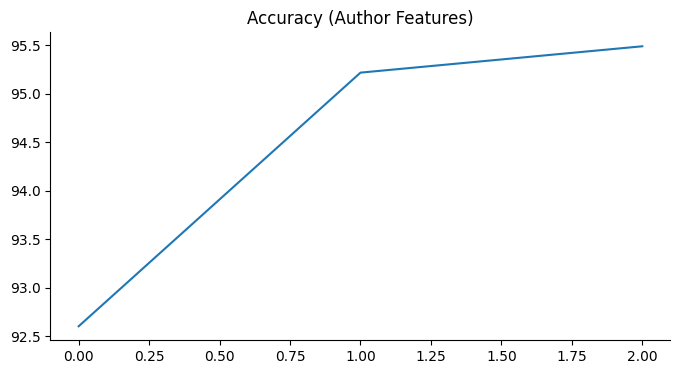

In [41]:
# @title Accuracy Plot( Author's Features)

from matplotlib import pyplot as plt
df_results['Accuracy (Author Features)'].plot(kind='line', figsize=(8, 4), title='Accuracy (Author Features)')
plt.gca().spines[['top', 'right']].set_visible(False)

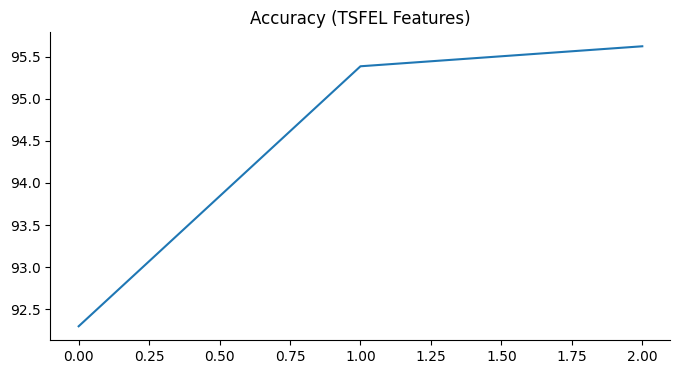

In [40]:
# @title Accuracy Plot (TSFEL Features)

from matplotlib import pyplot as plt
df_results['Accuracy (TSFEL Features)'].plot(kind='line', figsize=(8, 4), title='Accuracy (TSFEL Features)')
plt.gca().spines[['top', 'right']].set_visible(False)

### BARCHART SHOWING COMPARISON

In [51]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_results["Model"],
    y=df_results["Accuracy (TSFEL Features)"],
    name="TSFEL Features",
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=df_results["Model"],
    y=df_results["Accuracy (Author Features)"],
    name="Author Features",
    marker_color='red'
))
fig.update_layout(
    title="Comparison of ML Model Performance on TSFEL vs Author Features",
    xaxis_title="Model",
    yaxis_title="Accuracy (%)",
    barmode='group',
    template="plotly_white"
)
fig.show()


### CONCLUSION

*KEY OBSERVATIONS*



1.  Random Forest performed slightly better on Author features (92.60%) than TSFEL (92.30%).

2.   SVM & Logistic Regression performed better on TSFEL features than Author features (by a small margin).

3.   Overall, TSFEL-generated features slightly outperformed Author features in 2 out of 3 models.





*RESULT*



*   Author Features are slightly better if using Random forest

*   TSFEL Features give better accuracy if using SVM or Logistic Regression

*   TSFEL-generated features generally performed better in complex models like SVM & Logistic Regression.

*   Both feature sets are strong, but TSFEL offers more flexibility for ML models.

